In [1]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns
from numba import jit
import os 
import glob 

In [2]:
amsterdam_weekdays = pd.read_csv('amsterdam_weekdays.csv', index_col=0, encoding='latin1')
amsterdam_weekends = pd.read_csv('amsterdam_weekends.csv', index_col=0, encoding='latin1')
athens_weekdays = pd.read_csv('athens_weekdays.csv', index_col=0, encoding='latin1')
athens_weekends = pd.read_csv('athens_weekends.csv', index_col=0, encoding='latin1')
barcelona_weekdays = pd.read_csv('barcelona_weekdays.csv', index_col=0, encoding='latin1')
barcelona_weekends = pd.read_csv('barcelona_weekends.csv', index_col=0, encoding='latin1')
berlin_weekdays = pd.read_csv('berlin_weekdays.csv', index_col=0, encoding='latin1')
berlin_weekends = pd.read_csv('berlin_weekends.csv', index_col=0, encoding='latin1')
budapest_weekdays = pd.read_csv('budapest_weekdays.csv', index_col=0, encoding='latin1')
budapest_weekends = pd.read_csv('budapest_weekends.csv', index_col=0, encoding='latin1')
lisbon_weekdays = pd.read_csv('lisbon_weekdays.csv', index_col=0, encoding='latin1')
lisbon_weekends = pd.read_csv('lisbon_weekends.csv', index_col=0, encoding='latin1')
london_weekdays = pd.read_csv('london_weekdays.csv', index_col=0, encoding='latin1')
london_weekends = pd.read_csv('london_weekends.csv', index_col=0, encoding='latin1')
paris_weekdays = pd.read_csv('paris_weekdays.csv', index_col=0, encoding='latin1')
paris_weekends = pd.read_csv('paris_weekends.csv', index_col=0, encoding='latin1')
rome_weekdays = pd.read_csv('rome_weekdays.csv', index_col=0, encoding='latin1')
rome_weekends = pd.read_csv('rome_weekends.csv', index_col=0, encoding='latin1')
vienna_weekdays = pd.read_csv('vienna_weekdays.csv', index_col=0, encoding='latin1')
vienna_weekends = pd.read_csv('vienna_weekends.csv', index_col=0, encoding='latin1')

In [3]:
dataframes = [amsterdam_weekdays,amsterdam_weekends,athens_weekdays,athens_weekends,barcelona_weekdays,barcelona_weekends,berlin_weekdays,berlin_weekends,
              budapest_weekdays,budapest_weekends,lisbon_weekdays,lisbon_weekends,london_weekdays,london_weekends,paris_weekdays,paris_weekends,rome_weekdays,
              rome_weekends,vienna_weekdays,vienna_weekends]

In [4]:
if all([set(dataframes[0].columns) == set(df.columns) for df in dataframes]):
    print('All dataframes have the same columns')
else:
    print('Some dataframes have different columns')

All dataframes have the same columns


In [5]:
# dataframes = [amsterdam_weekdays,amsterdam_weekends,athens_weekdays,athens_weekends,barcelona_weekdays,barcelona_weekends,berlin_weekdays,berlin_weekends,
#               budapest_weekdays,budapest_weekends,lisbon_weekdays,lisbon_weekends,london_weekdays,london_weekends,paris_weekdays,paris_weekends,rome_weekdays,
#               rome_weekends,vienna_weekdays,vienna_weekends]

def produce_missing_report(df):
    percent_missing = df.isna().sum() * 100 / len(df)
    missing_value_df = pd.DataFrame({'percent_missing': percent_missing})
    return missing_value_df

for dataframe in dataframes:
    print(produce_missing_report(dataframe))
    print('\n')

                            percent_missing
realSum                                 0.0
room_type                               0.0
room_shared                             0.0
room_private                            0.0
person_capacity                         0.0
host_is_superhost                       0.0
multi                                   0.0
biz                                     0.0
cleanliness_rating                      0.0
guest_satisfaction_overall              0.0
bedrooms                                0.0
dist                                    0.0
metro_dist                              0.0
attr_index                              0.0
attr_index_norm                         0.0
rest_index                              0.0
rest_index_norm                         0.0
lng                                     0.0
lat                                     0.0


                            percent_missing
realSum                                 0.0
room_type                     

In [6]:
# dataframes = [amsterdam_weekdays,amsterdam_weekends,athens_weekdays,athens_weekends,barcelona_weekdays,barcelona_weekends,berlin_weekdays,berlin_weekends,
#               budapest_weekdays,budapest_weekends,lisbon_weekdays,lisbon_weekends,london_weekdays,london_weekends,paris_weekdays,paris_weekends,rome_weekdays,
#               rome_weekends,vienna_weekdays,vienna_weekends]

print('Number of rows in each dataframe: ')
for df in dataframes:
    print(len(df.index)) 

Number of rows in each dataframe: 
1103
977
2653
2627
1555
1278
1284
1200
2074
1948
2857
2906
4614
5379
3130
3558
4492
4535
1738
1799


In [7]:
if all(set(dataframes[0].dtypes)):
    print('The dataframes all have the same datatypes')
else:
    print('Some of the dataframes have different datatypes')

The dataframes all have the same datatypes


In [8]:
#since all the dataframes have the same columns and same datatypes, just printing them for one .csv file should give us the information we want, for all
#the .csv files.
london_weekdays.dtypes

realSum                       float64
room_type                      object
room_shared                      bool
room_private                     bool
person_capacity               float64
host_is_superhost                bool
multi                           int64
biz                             int64
cleanliness_rating            float64
guest_satisfaction_overall    float64
bedrooms                        int64
dist                          float64
metro_dist                    float64
attr_index                    float64
attr_index_norm               float64
rest_index                    float64
rest_index_norm               float64
lng                           float64
lat                           float64
dtype: object

In [9]:
csv_files=glob.glob('*.{}'.format('csv'))
csv_files

['amsterdam_weekdays.csv',
 'amsterdam_weekends.csv',
 'athens_weekdays.csv',
 'athens_weekends.csv',
 'barcelona_weekdays.csv',
 'barcelona_weekends.csv',
 'berlin_weekdays.csv',
 'berlin_weekends.csv',
 'budapest_weekdays.csv',
 'budapest_weekends.csv',
 'CleanedData.csv',
 'lisbon_weekdays.csv',
 'lisbon_weekends.csv',
 'london_weekdays.csv',
 'london_weekends.csv',
 'paris_weekdays.csv',
 'paris_weekends.csv',
 'rome_weekdays.csv',
 'rome_weekends.csv',
 'vienna_weekdays.csv',
 'vienna_weekends.csv']

In [10]:
df_append=pd.DataFrame()
for file in csv_files:
    df_temp=pd.read_csv(file)
    df_append=df_append.append(df_temp, ignore_index=True)
df_append

C:\Users\Canaan Presbyterian\AppData\Local\Temp\ipykernel_16328\2751399899.py:4: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_append=df_append.append(df_temp, ignore_index=True)
C:\Users\Canaan Presbyterian\AppData\Local\Temp\ipykernel_16328\2751399899.py:4: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_append=df_append.append(df_temp, ignore_index=True)
C:\Users\Canaan Presbyterian\AppData\Local\Temp\ipykernel_16328\2751399899.py:4: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_append=df_append.append(df_temp, ignore_index=True)
C:\Users\Canaan Presbyterian\AppData\Local\Temp\ipykernel_16328\2751399899.py:4: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. 

,Unnamed: 0,realSum,room_type,room_shared,room_private,person_capacity,host_is_superhost,multi,biz,cleanliness_rating,...,dist,metro_dist,attr_index,attr_index_norm,rest_index,rest_index_norm,lng,lat,Unnamed: 0.2,Unnamed: 0.1
0,0,194.033698,Private room,False,True,2.0,False,1.0,0.0,10.0,...,5.022964,2.539380,78.690379,4.166708,98.253896,6.846473,4.90569,52.41772,NaN,NaN
1,1,344.245776,Private room,False,True,4.0,False,0.0,0.0,8.0,...,0.488389,0.239404,631.176378,33.421209,837.280757,58.342928,4.90005,52.37432,NaN,NaN
2,2,264.101422,Private room,False,True,2.0,False,0.0,1.0,9.0,...,5.748312,3.651621,75.275877,3.985908,95.386955,6.646700,4.97512,52.36103,NaN,NaN
3,3,433.529398,Private room,False,True,4.0,False,0.0,1.0,9.0,...,0.384862,0.439876,493.272534,26.119108,875.033098,60.973565,4.89417,52.37663,NaN,NaN
4,4,485.552926,Private room,False,True,2.0,True,0.0,0.0,10.0,...,0.544738,0.318693,552.830324,29.272733,815.305740,56.811677,4.90051,52.37508,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
155116,1794,715.938574,Entire home/apt,False,False,6.0,False,0.0,1.0,10.0,...,0.530181,0.135447,219.402478,15.712158,438.756874,10.604584,16.37940,48.21136,NaN,NaN
155117,1795,304.793960,Entire home/apt,False,False,2.0,False,0.0,0.0,8.0,...,0.810205,0.100839,204.970121,14.678608,342.182813,8.270427,16.38070,48.20296,NaN,NaN
155118,1796,637.168969,Entire home/apt,False,False,2.0,False,0.0,0.0,10.0,...,0.994051,0.202539,169.073402,12.107921,282.296424,6.822996,16.38568,48.20460,NaN,NaN
155119,1797,301.054157,Private room,False,True,2.0,False,0.0,0.0,10.0,...,3.044100,0.287435,109.236574,7.822803,158.563398,3.832416,16.34100,48.19200,NaN,NaN


In [11]:
to_drop = ['lng', 'lat', 'biz', 'multi', 'attr_index', 'attr_index_norm', 'rest_index', 'rest_index_norm']
cleaned_dataset = (df_append.drop(to_drop, axis=1))

In [12]:
cleaned_dataset.head()

,Unnamed: 0,realSum,room_type,room_shared,room_private,person_capacity,host_is_superhost,cleanliness_rating,guest_satisfaction_overall,bedrooms,dist,metro_dist,Unnamed: 0.2,Unnamed: 0.1
0,0,194.033698,Private room,False,True,2.0,False,10.0,93.0,1,5.022964,2.539380,NaN,NaN
1,1,344.245776,Private room,False,True,4.0,False,8.0,85.0,1,0.488389,0.239404,NaN,NaN
2,2,264.101422,Private room,False,True,2.0,False,9.0,87.0,1,5.748312,3.651621,NaN,NaN
3,3,433.529398,Private room,False,True,4.0,False,9.0,90.0,2,0.384862,0.439876,NaN,NaN
4,4,485.552926,Private room,False,True,2.0,True,10.0,98.0,1,0.544738,0.318693,NaN,NaN


In [13]:
cleaned_dataset.shape

(155121, 14)

In [14]:
cleaned_dataset.to_csv(r"C:\Users\Canaan Presbyterian\Documents\UWI\COMP 3610 Big Data Analytics\Project\CleanedData.csv")

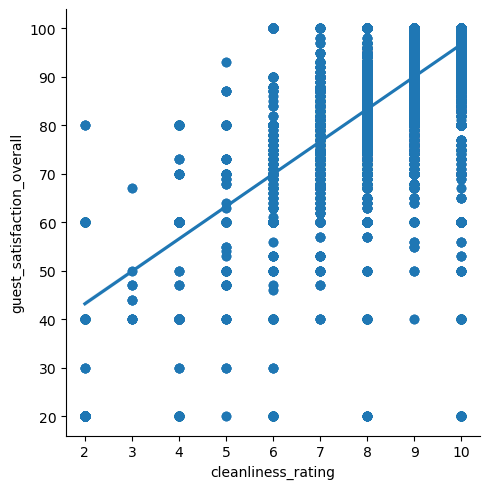

In [15]:
sns.lmplot(x='cleanliness_rating', y='guest_satisfaction_overall', data=cleaned_dataset)

(0.0, 110.0)

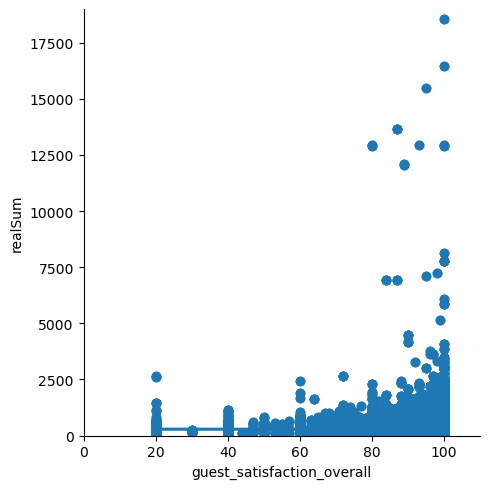

In [21]:
sns.lmplot(x='guest_satisfaction_overall', y='realSum', data=cleaned_dataset)
# Tweak axes using Matplotlib
plt.ylim(0, 19000)
plt.xlim(0, 110)

(0.0, 110.0)

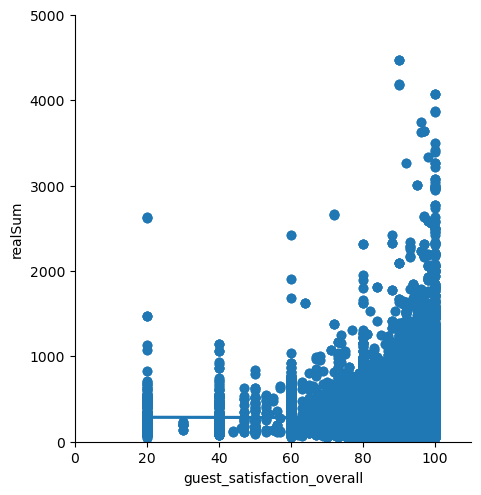

In [22]:
#We can see the majority of the points cluster in the range of 0 to 5000
sns.lmplot(x='guest_satisfaction_overall', y='realSum', data=cleaned_dataset)
# Tweak axes using Matplotlib
plt.ylim(0, 5000)
plt.xlim(0, 110)

<Axes: >

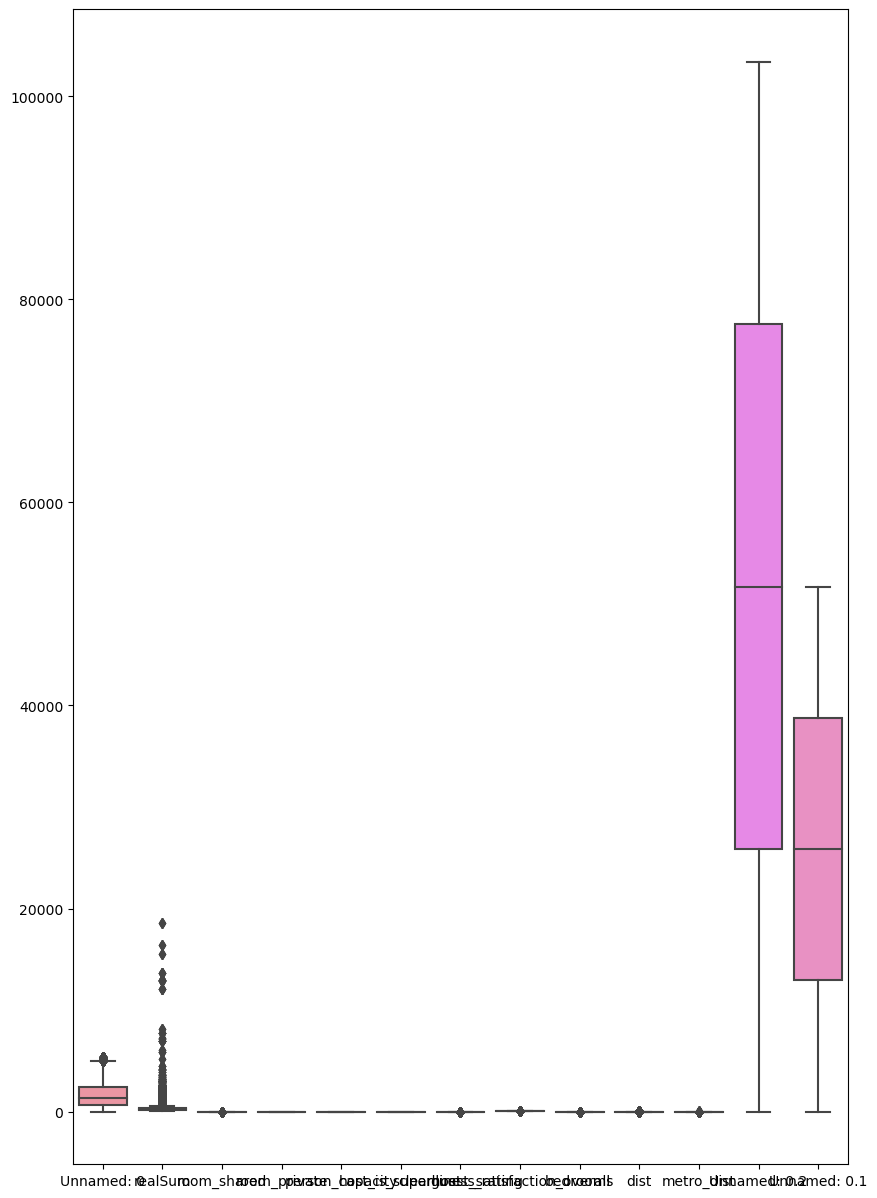

In [18]:
# plt.figure(figsize=(10, 6))

# labels = ['1', '2', '3', '4', '5']
# cleanliness_rating_count = df['cleanliness_rating'].value_counts(normalize=True) * 100
# colors = ['#581845', '#900C3F', '#C70039', '#FF5733', '#FFC300']

# plt.bar(labels, cleanliness_rating_count.values, color=colors)

# plt.title('Bar Chart Showing Distribution of Cleanliness Ratings')
# plt.xlabel('Cleanliness Rating')
# plt.ylabel('Percentage')
# plt.ylim(top=100)

# for i, v in enumerate(cleanliness_rating_count.values):
#     plt.text(i, v+2, f"{v:.1f}%", font)

plt.figure(figsize=(10, 15))
sns.boxplot(data=cleaned_dataset)